In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import function as f

In [20]:
def draw_plot(_x_values, _y_values, _title_name, x_label, y_label):
    plt.figure(figsize=(5,3))
    plt.plot(_x_values, _y_values , marker='o', linestyle='-', color = 'navy')
    plt.title(_title_name, fontsize=9, ha='center')

    plt.ylim(_y_values.min() - 0.05, _y_values.max() + 0.05)
    plt.xlabel(x_label, fontsize=9)
    plt.ylabel(y_label, fontsize=9)

    plt.grid(True)
    plt.show()

In [21]:
def create_congestion_df(csv_data):
    columns = ['Truck_num', 'Repeat_time'] + csv_data[0][1][0]

    data_list = []

    for file_name, file_data in csv_data:
        truck_num = file_name.split('_')[2]
        # remove .csv
        repeat_time = file_name.split('_')[-1].split('.')[0]
        
        if repeat_time == '100' :
            repeat_time = '1'
            
        for row in file_data[1:]:
            # print(row)
            row[4:] = [float(value) for value in row[4:]]
            new_row = [truck_num, repeat_time] + row
            data_list.append(new_row)

    df = pd.DataFrame(data_list, columns=columns)
    return df

In [22]:
def merge_df(df1, df2):
    merged_df = pd.merge(df1, df2, on=['Truck_num', 'Repeat_time', 'Truck_id'], suffixes=('_wt', '_wot'))
    return merged_df

### LP_0_0_100

In [23]:
folder_name = 'congestion/prev_LP_0_0_100_together/'
congestion_all_csv_data = f.load_csv_files_in_folder(folder_name)

congestion_wt_df = create_congestion_df(congestion_all_csv_data)
congestion_wt_df[(congestion_wt_df['Truck_num'] == '20') & (congestion_wt_df['Truck_id'] == 'Truck-0')]

,Truck_num,Repeat_time,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
181,20,1,Truck-0,Route-0,(425.0 0.0 155.5),(625.0 0.0 150.0),406.720,31.944,69.768
188,20,2,Truck-0,Route-0,(675.0 0.0 5.5),(625.0 0.0 200.0),361.696,8.944,47.728
206,20,3,Truck-0,Route-0,(175.0 0.0 55.5),(125.0 0.0 200.0),350.424,8.136,37.296


In [24]:
folder_name = 'congestion/prev_LP_0_0_100_onebyone/'
congestion_onebyone_all_csv_data = f.load_csv_files_in_folder(folder_name)

congestion_wot_df = create_congestion_df(congestion_onebyone_all_csv_data)
congestion_wot_df[(congestion_wot_df['Truck_num'] == '20') & (congestion_wot_df['Truck_id'] == 'Truck-0')]

,Truck_num,Repeat_time,Truck_id,Route_id,Origin,Destination,Total Time,PickupSta AT,DropSta AT
145,20,1,Truck-0,Route-0,(425.0 0.0 155.5),(625.0 0.0 150.0),382.064,32.120,44.936
165,20,2,Truck-0,Route-0,(675.0 0.0 5.5),(625.0 0.0 200.0),361.352,8.568,47.784
185,20,3,Truck-0,Route-0,(175.0 0.0 55.5),(125.0 0.0 200.0),352.864,8.496,39.384


### Merge DataFrame

In [25]:
# Merge the two dataframes on 'Truck_num' and 'Truck_id' columns
df = merge_df(congestion_wt_df, congestion_wot_df)

# Calculate the difference between 'Total Time' columns
df['Pickup Congestion ratio'] = (df['PickupSta AT_wt'] - df['PickupSta AT_wot'])/df['PickupSta AT_wt']
df['Drop Congestion ratio'] = (df['DropSta AT_wt'] - df['DropSta AT_wot'])/df['DropSta AT_wt']

### Plot

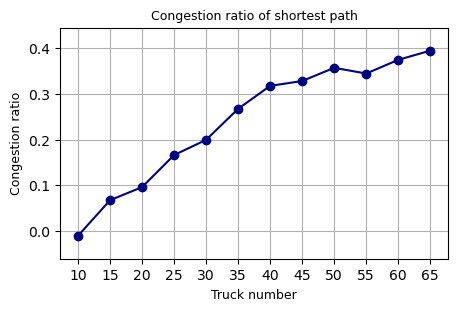

In [26]:
congestion_df = pd.DataFrame(df['Truck_num'].unique(), columns=['Truck_num'])
congestion_df['congestion_ratio'] = df.groupby('Truck_num')[['Pickup Congestion ratio', 'Drop Congestion ratio']].mean().mean(axis=1).tolist()

x_value = congestion_df['Truck_num']
y_value = congestion_df['congestion_ratio']

x_label = 'Truck number'
y_label = 'Congestion ratio'
title_name = 'Congestion ratio of shortest path'

draw_plot(x_value, y_value, title_name, x_label, y_label)

In [27]:
congestion_df

,Truck_num,congestion_ratio
0,10,-0.010091
1,15,0.067606
2,20,0.096160
3,25,0.166087
4,30,0.199308
5,35,0.267036
6,40,0.317103
7,45,0.327742
8,50,0.356509
9,55,0.343984
